In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
m = 0.7
c = 0.3

X = np.arange(0,1,0.02)
y = m*X*X*X + c
print(X[:5])
print(y[:5])

[0.   0.02 0.04 0.06 0.08]
[0.3       0.3000056 0.3000448 0.3001512 0.3003584]


In [25]:
X.shape, y.shape

((50,), (50,))

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [43]:
def plot_data(
    X_train = X_train,
    X_test = X_test,
    y_train = y_train,
    y_test = y_test,
    predictions = None
):
    plt.figure(figsize=(8,6))
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("X vs y")
    plt.scatter(X_train, y_train, c='b', s=10, label="Training data")
    plt.scatter(X_test, y_test, c="r", s=10, label="Testing Data")
    if predictions is not None:
        plt.scatter(X_test, predictions, c="g", s=10, label="Predictions")
    plt.legend()

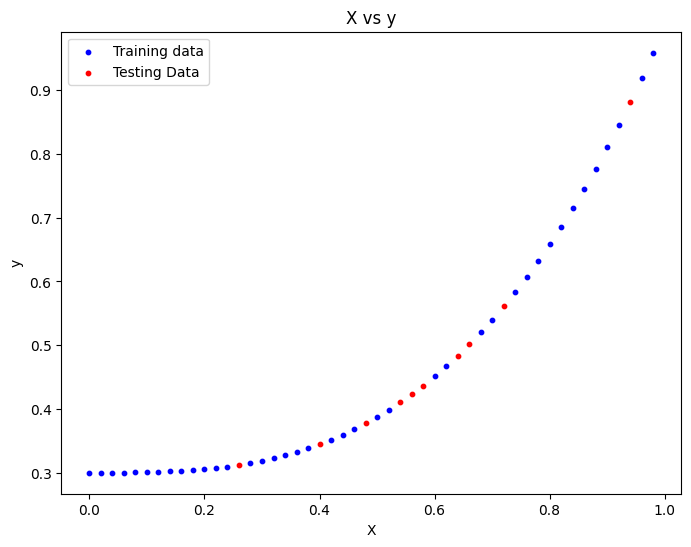

In [44]:
plot_data()

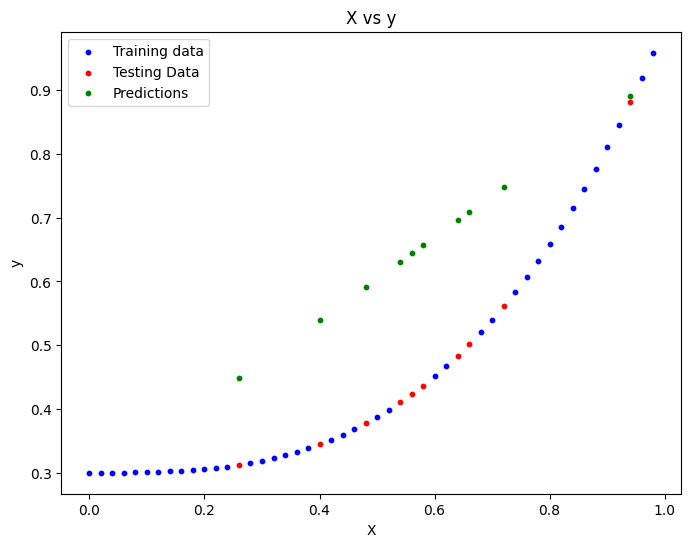

In [45]:
y_pred = 0.65*X_test + 0.28
plot_data(predictions=y_pred)

MSE=  <function mean_squared_error at 0x000001BA64F4A3E0>
ASE=  <function mean_absolute_error at 0x000001BA64F4A020>


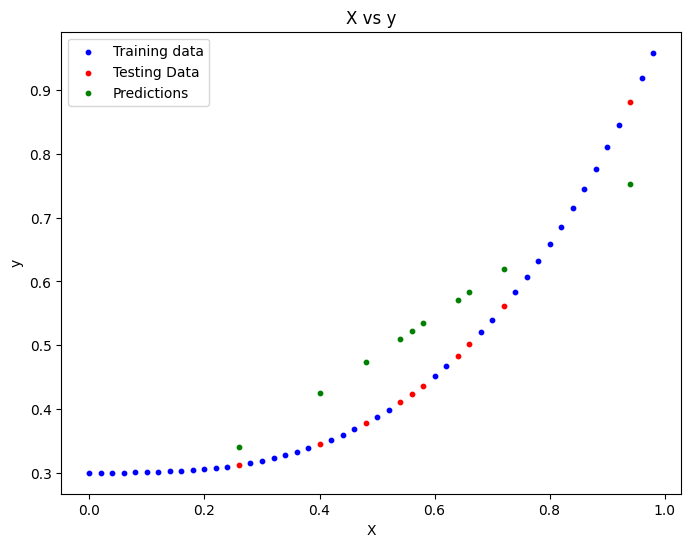

In [46]:
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1),y_train)
y_pred = lr.predict(X_test.reshape(-1,1))
plot_data(predictions=y_pred)
print("MSE= ", mean_squared_error)
print("ASE= ", mean_absolute_error)

In [23]:
import pickle
with open('regression.pkl','wb') as file:
    pickle.dump(lr,file)

In [48]:
with open("regression.pkl", "rb") as file:
    model = pickle.load(file)

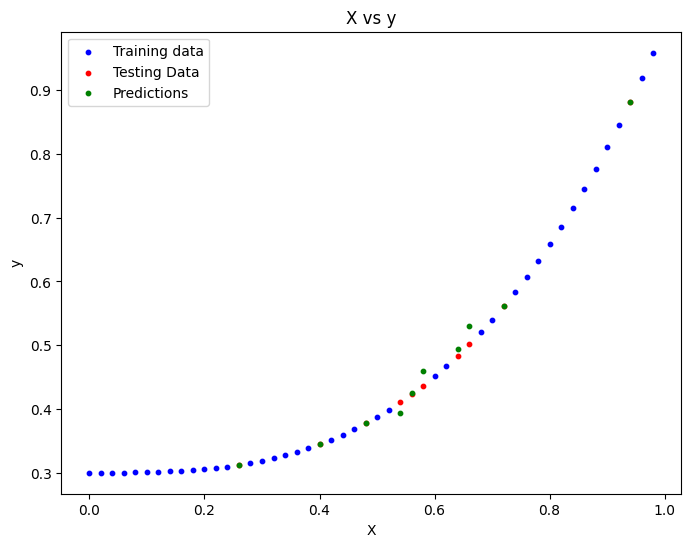

In [47]:
knnr = KNeighborsRegressor(n_neighbors=2)
knnr.fit(X_train.reshape(-1,1),y_train)
y_out = knnr.predict(X_test.reshape(-1,1))
plot_data(predictions=y_out)